<a href="https://colab.research.google.com/github/faisalnawazmir/Econometrics-ML_for_Finance/blob/main/Arima_virus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

In [1]:
import statsmodels.tsa.api as smt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.stattools import acf
import matplotlib.pyplot as plt
import numpy as np
import pickle
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [5]:
file = r'/gdrive/My Drive/data/coronavirus data.xlsx'
df=pd.read_excel(open(file, 'rb'),sheet_name='pakistan') 
df.head()

,Sr. No,Date,Commulative Confirmed Cases,Active Cases,Recoveries,Deaths
0,1,2020-02-26,2.0,2.0,0.0,0.0
1,2,2020-02-27,2.0,2.0,0.0,0.0
2,3,2020-02-28,2.0,2.0,0.0,0.0
3,4,2020-02-29,4.0,4.0,0.0,0.0
4,5,2020-03-01,4.0,4.0,0.0,0.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Sr. No                       310 non-null    int64         
 1   Date                         310 non-null    datetime64[ns]
 2   Commulative Confirmed Cases  243 non-null    float64       
 3   Active Cases                 243 non-null    float64       
 4   Recoveries                   243 non-null    float64       
 5   Deaths                       243 non-null    float64       
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 14.7 KB


In [7]:
df['confirmed'] = df['Commulative Confirmed Cases'].\
transform(lambda x : np.log(x /x.shift(1)))

In [8]:
df = df.dropna()
df.head()

,Sr. No,Date,Commulative Confirmed Cases,Active Cases,Recoveries,Deaths,confirmed
1,2,2020-02-27,2.0,2.0,0.0,0.0,0.000000
2,3,2020-02-28,2.0,2.0,0.0,0.0,0.000000
3,4,2020-02-29,4.0,4.0,0.0,0.0,0.693147
4,5,2020-03-01,4.0,4.0,0.0,0.0,0.000000
5,6,2020-03-02,4.0,4.0,0.0,0.0,0.000000


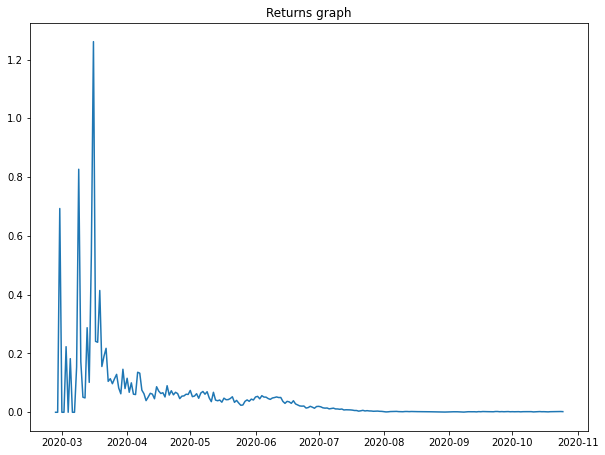

In [9]:
plt.figure(figsize=[10, 7.5]); # Set dimensions for figure
plt.plot(df['Date'],df['confirmed'])
plt.title("Returns graph")
plt.show()

In [29]:
images_dir = '/gdrive/My Drive/Images/'
plt.savefig(f"{images_dir}/abc.png")

<Figure size 432x288 with 0 Axes>

In [10]:
acf,q,pval = smt.acf(df['confirmed'],nlags=12,qstat=True)
pacf = smt.pacf(df['confirmed'],nlags=12)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


In [11]:
correlogram = pd.DataFrame({'acf':acf[1:],
'pacf':pacf[1:],
'Q':q,
'p-val':pval})
correlogram

,acf,pacf,Q,p-val
0,0.415002,0.416724,42.197703,8.249685e-11
1,0.259141,0.106059,58.719802,1.774831e-13
2,0.392806,0.313566,96.840703,7.424970e-21
3,0.284787,0.036340,116.962566,2.378383e-24
4,0.251926,0.098624,132.775152,6.130717e-27
5,0.381912,0.216090,169.268947,6.427494e-34
6,0.424149,0.226764,214.472593,9.824127e-43
7,0.239571,-0.062204,228.955540,4.924684e-45
8,0.310979,0.124682,253.463815,1.851624e-49
9,0.237497,-0.114007,267.819774,9.633487e-52


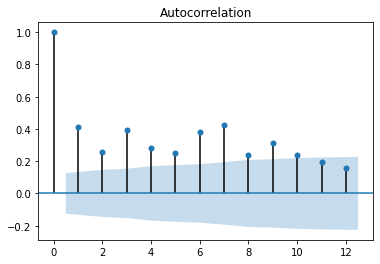

In [30]:
plot_acf(df['confirmed'], lags=12);

In [31]:
plt.savefig(f"{images_dir}/correlogram.png")

<Figure size 432x288 with 0 Axes>

In [13]:
res = smt.ARIMA(df['confirmed'], order=(1,0,1)).fit()
print(res.summary())

                              ARMA Model Results                              
Dep. Variable:              confirmed   No. Observations:                  242
Model:                     ARMA(1, 1)   Log Likelihood                 207.224
Method:                       css-mle   S.D. of innovations              0.103
Date:                Sun, 22 Nov 2020   AIC                           -406.449
Time:                        15:47:11   BIC                           -392.493
Sample:                             0   HQIC                          -400.827
                                                                              
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0545      0.035      1.545      0.124      -0.015       0.124
ar.L1.confirmed     0.9698      0.023     41.401      0.000       0.924       1.016
ma.L1.confirmed    -0.8226      

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [14]:
print(res.aic)
print(res.bic)

-406.44865368414264
-392.4929027795159


In [15]:
smt.ArmaProcess.from_estimation(res).isstationary

True

In [16]:
res1 = smt.arma_order_select_ic(df['confirmed'],\
max_ar=5, max_ma=5, ic=['aic', 'bic'],\
fit_kw={'method':'css-mle',
'solver':'bfgs'})

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/pyt

In [17]:
print('AIC')
print(res1.aic)
print('SBIC')
print(res1.bic)

AIC
            0           1           2           3           4           5
0 -336.988820 -374.937814 -373.325216 -402.141152 -403.516634 -404.570844
1 -380.611222 -406.448653 -408.083419 -404.845155 -416.979435 -429.242542
2 -381.299512 -406.647418 -434.893936 -433.537649 -431.761866 -428.513936
3 -407.055823 -411.230139 -433.472910 -359.506641 -388.472243 -405.274754
4 -405.089311 -413.911392 -431.763264 -384.448783 -390.006989 -417.488178
5 -405.609808 -416.447332 -424.501461 -439.147689 -412.471289 -396.072150
SBIC
            0           1           2           3           4           5
0 -330.010944 -364.471001 -359.369465 -384.696463 -382.583007 -380.148280
1 -370.144409 -392.492903 -390.638730 -383.911529 -392.556871 -401.331040
2 -367.343761 -389.202729 -413.960309 -409.115085 -403.850365 -397.113497
3 -389.611134 -390.296512 -409.050346 -331.595139 -357.071803 -370.385377
4 -384.155684 -389.488828 -403.851762 -353.048343 -355.117612 -379.109863
5 -381.187244 -388.535830 -39

In [18]:
print(res1.aic_min_order)
print(res1.bic_min_order)

(5, 3)
(2, 2)


#1  Forecasting using ARMA models

In [19]:
import pickle
import statsmodels.tsa.api as smt
import numpy as np
from sklearn.metrics import mean_squared_error
from math import sqrt

In [20]:
df['datetime'] = pd.to_datetime(df['Date'])
df= df.set_index('datetime')
df.drop(['Date'], axis=1, inplace=True)
df.head()

,Sr. No,Commulative Confirmed Cases,Active Cases,Recoveries,Deaths,confirmed
datetime,,,,,,
2020-02-27,2,2.0,2.0,0.0,0.0,0.000000
2020-02-28,3,2.0,2.0,0.0,0.0,0.000000
2020-02-29,4,4.0,4.0,0.0,0.0,0.693147
2020-03-01,5,4.0,4.0,0.0,0.0,0.000000
2020-03-02,6,4.0,4.0,0.0,0.0,0.000000


In [21]:
df_insample = df['2020-02-27':'2020-09-30'] #yyyy-mm-dd
df_insample.tail()

,Sr. No,Commulative Confirmed Cases,Active Cases,Recoveries,Deaths,confirmed
datetime,,,,,,
2020-09-26,214,310275.0,8205.0,295613.0,6457.0,0.002239
2020-09-27,215,310844.0,8356.0,296022.0,6466.0,0.001832
2020-09-28,216,311516.0,8702.0,296340.0,6474.0,0.002160
2020-09-29,217,312263.0,8903.0,296881.0,6479.0,0.002395
2020-09-30,218,312806.0,8825.0,297497.0,6484.0,0.001737


In [22]:
model = smt.ARIMA(df_insample['confirmed'], order=(2,0,2))
res = model.fit()
print(res.summary())

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


                              ARMA Model Results                              
Dep. Variable:              confirmed   No. Observations:                  217
Model:                     ARMA(2, 2)   Log Likelihood                 188.472
Method:                       css-mle   S.D. of innovations              0.101
Date:                Sun, 22 Nov 2020   AIC                           -364.944
Time:                        15:49:58   BIC                           -344.664
Sample:                    02-27-2020   HQIC                          -356.752
                         - 09-30-2020                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0618      0.041      1.511      0.132      -0.018       0.142
ar.L1.confirmed     0.2543      0.057      4.478      0.000       0.143       0.366
ar.L2.confirmed     0.7040      

In [23]:
model = smt.ARIMA(df['confirmed'], order=(2,0,0))
res = model.fit()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


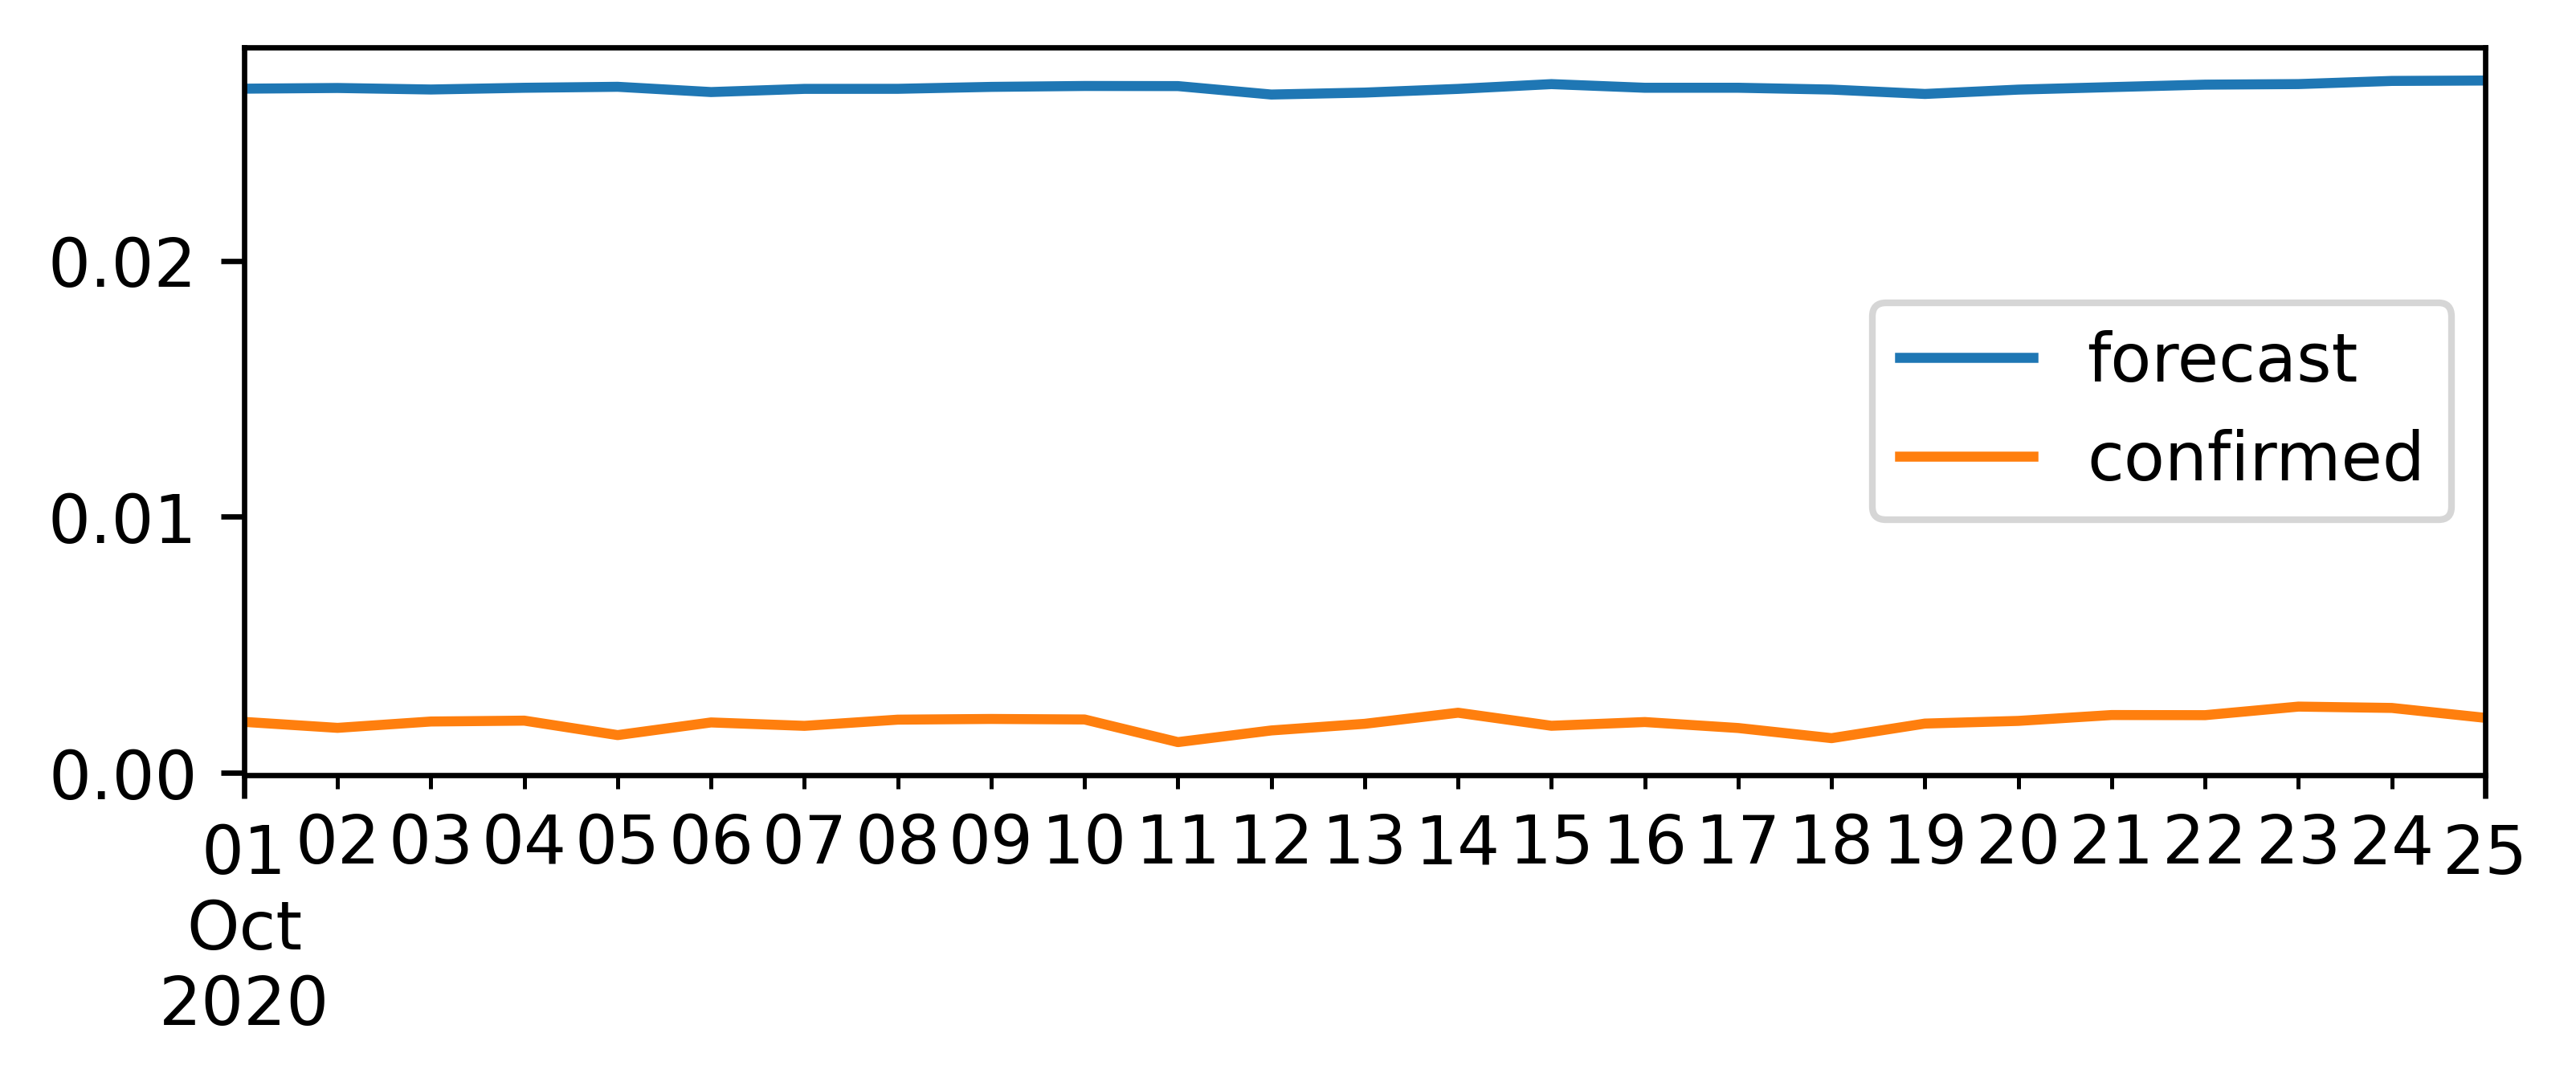

In [24]:
fig=res.plot_predict('2020-10-01','2020-10-25',dynamic=False)
fig.set_dpi(600)
fig.set_size_inches(6, 2)
fig.show()

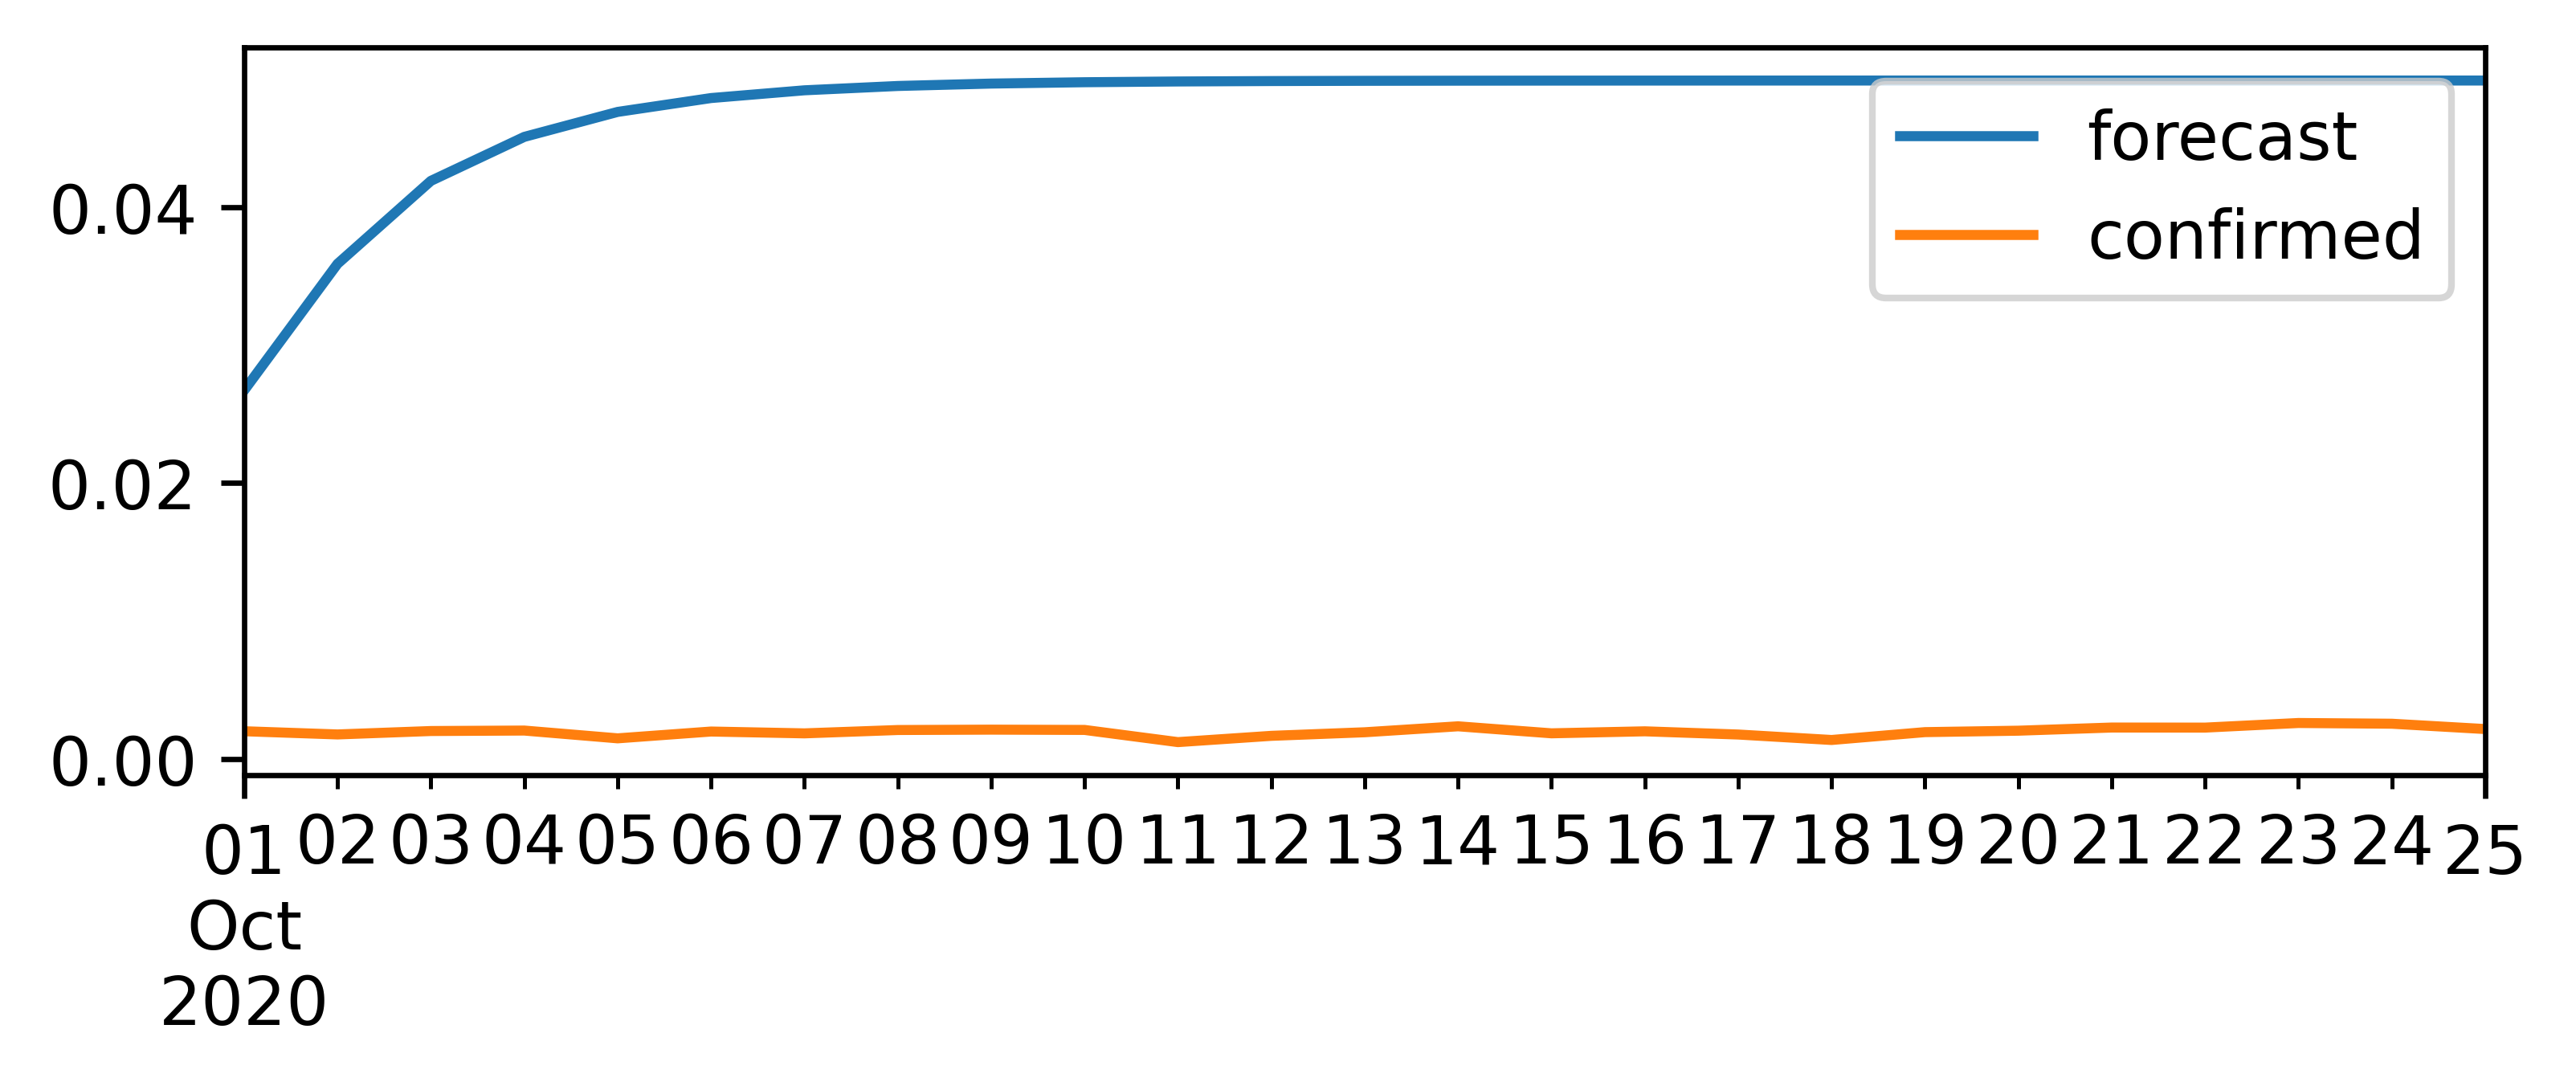

In [25]:
fig = res.plot_predict('2020-10-01','2020-10-25',dynamic=True)
fig.set_dpi(600)
fig.set_size_inches(6, 2)
fig.show()

In [26]:
def rmse(pred, target):
  return np.sqrt(((pred - target) ** 2).mean())

In [27]:
df_outsample = df['2020-10-01':'2020-10-25']
pred = res.predict('2020-10-01','2020-10-25',dynamic=False)

stats1 = rmse(pred, df_outsample['confirmed'])
print('root mean squared error1: {}'.format(stats1) )

stats2 = sqrt(mean_squared_error(df_outsample['confirmed'], pred))
print('root mean squared error2: {}'.format(stats2) )

root mean squared error1: 0.024778928599669667
root mean squared error2: 0.024778928599669667
